In [28]:
import os
import sys
import math
import matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap, cm

##### If you are having trouble with Basemap after you have installed it, you may have to include the following line with your path to directory where basemap was installed

In [29]:
#os.environ['PROJ_LIB'] = 'C:\\Users\\mlein\\.conda\\envs\\pyenv1\\Library\\share' ## path to basemap folder in .conda

#### Change directory to source file location and read in csv that was produced from R script 2_PieChartMapPrepData_fig1.R

In [30]:
os.chdir(sys.path[0])
df = pd.read_csv('..\\Data\\Fig1_PieChartMapData.csv')
df.head()

,LOCATION,Latitude,Longitude,totalCRinAmil,Carbonyl,PAH,PM,VOC
0,"Atlanta, GA",33.688080,-84.290180,40.053527,0.613729,0.043957,0.093446,0.248868
1,"Bountiful, UT",40.902967,-111.884467,103.958092,0.783104,0.016525,0.040731,0.159640
2,"Bronx, NY",40.816000,-73.902000,68.292643,0.619036,0.070183,0.055405,0.255376
3,"Chesterfield, SC",34.615367,-80.198789,71.924042,0.821728,0.005707,0.052575,0.119991
4,"Chicago, IL",42.139996,-87.799227,54.234870,0.578971,0.105242,0.075536,0.240251


#### Define variables needed for color scheme (corresponds to carbonyl, PM, PAH, VOC, respectively) , lat/long of NATTS for graphing, and circle size (scaled to reflect average 5 year cancer risk in a million)  

In [31]:
colors = ['lightseagreen', 'red', 'gold', 'purple'] #carbonyl, PM, PAH, VOC
xlon=df['Longitude']       
ylat=df['Latitude']
scale = df['totalCRinAmil']

In [32]:
NATTS_HAP_data = np.zeros((27,4))

#### The following function draws a map and uses the lat/long values of NATTS as indicators for where to draw the pie charts. The pie charts are drawn and filled in according to the Carbonyl, PM, PAH, and VOC variables of df (which represent the 5 year average percent contribution from each group to total CR). Then the pie chart size is scaled according to the total 5 year average CR in a million. 

<ipython-input-33-1db4fc0ecb0c>:24: MatplotlibDeprecationWarning: Passing vertices as `(verts, 0)` is deprecated since Matplotlib 3.0, and support for it will be removed in 3.2.  Directly pass `verts` instead.
  ax.scatter([X],[Y] , marker=(xyi,0), s=size*si**2, facecolor=piecolors[i], edgecolor="k",linewidth=0.5,alpha=.7)


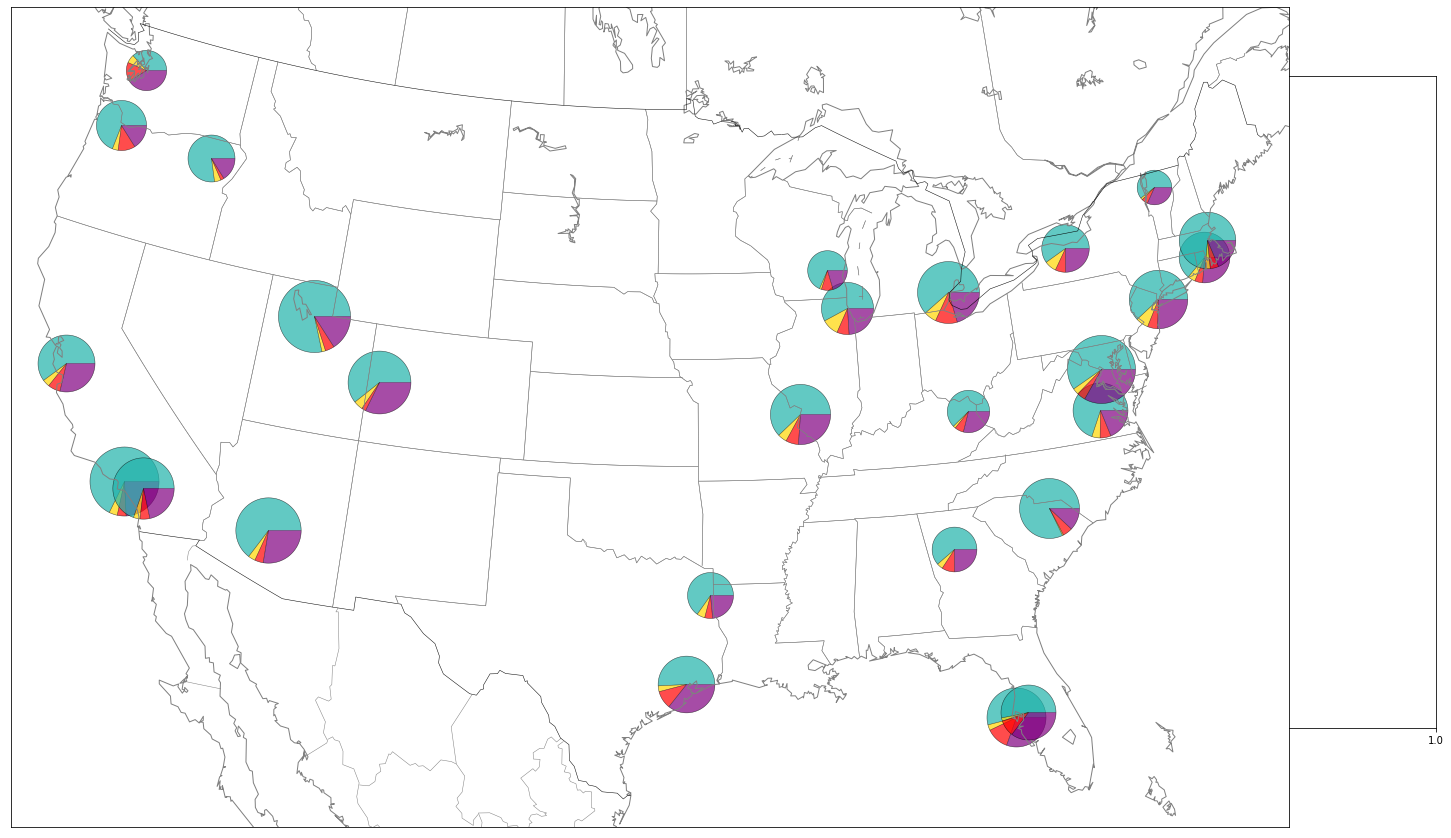

In [33]:
#Function to draw pie charts on map
def draw_pie(ax, X=0, Y=0, size = 1500, ratios = [0.25, 0.25, 0.25, 0.25]): 
    xy = []; s=[]
    start = 0.0 
 #   ratios=[0.05, 0.25, 0.10, 0.60]
    for ratio in ratios:
        x = [0] + np.cos(np.linspace(2*np.pi*start,2*np.pi*(start+ratio))).tolist() #30
        y = [0] + np.sin(np.linspace(2*np.pi*start,2*np.pi*(start+ratio))).tolist() #30

        xy1 = np.column_stack([x, y])
        s1 = np.abs(xy1).max()

        xy.append(xy1)
        s.append(s1)
        start = start + ratio

    piecolors = []
    for lt in range(4):
        c = NATTS_HAP_data[b,lt]-1
        c=int(c)
        piecolors.append(colors[c])
        
    for i, xyi, si in zip(range(4), xy,s):
            ax.scatter([X],[Y] , marker=(xyi,0), s=size*si**2, facecolor=piecolors[i], edgecolor="k",linewidth=0.5,alpha=.7)

NATTS_HAP_data[:,0] = 1
NATTS_HAP_data[:,1] = 3
NATTS_HAP_data[:,2] = 2
NATTS_HAP_data[:,3] = 4

fig, ax = plt.subplots(figsize = (24,12)) 
ax = fig.add_axes([.05,.01,.79,.95]) 
#draw_pie(ax,X, Y,size=100)

#plt.show()
x1 = -119 #left
x2 = -64 #right
y1 = 22 #bottom
y2 = 49 #top          

#plt.figure(figsize=(24,12))
#Create the map 
m = Basemap(resolution='l',llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=0,
           projection='lcc',lat_1=33,lat_2=45,lon_0=-95) #lat_ts=(x1+x2)/2 projection='merc'
m.drawcoastlines(color = 'gray')  
m.drawstates(color = 'gray')
m.drawcountries(color = 'black')   



#plots pie charts:
for b in range(27):
    X,Y=m(xlon[b],ylat[b]) 
    temp = df.iloc[b,:]
    my_list =[temp.Carbonyl, temp.PAH, temp.PM, temp.VOC]
    draw_pie(ax,X, Y,size=scale[b]*50, ratios = my_list)
    

plt.savefig('..\\Figures\\Fig1_pieChart.pdf')